In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv('breast-cancer-wisconsin-data_data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
data.shape

(569, 33)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# Drop unnecessary columns
data.drop(columns=['id', 'Unnamed: 32'], inplace=True)

# Check for duplicate IDs
duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicate rows if any
data = data.drop_duplicates()

# Encode the target variable 'diagnosis'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])


Number of duplicate rows: 0


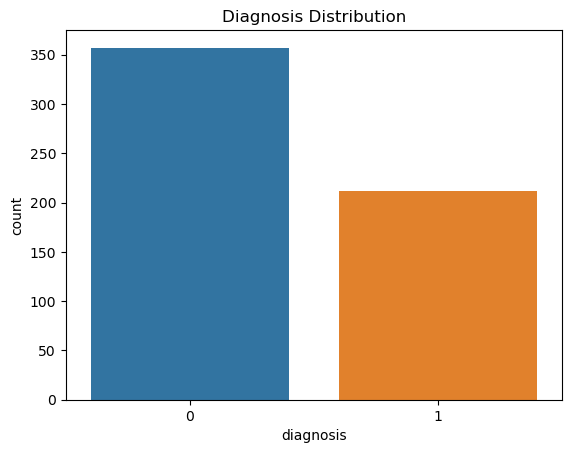

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable
sns.countplot(x='diagnosis', data=data)
plt.title('Diagnosis Distribution')
plt.show()

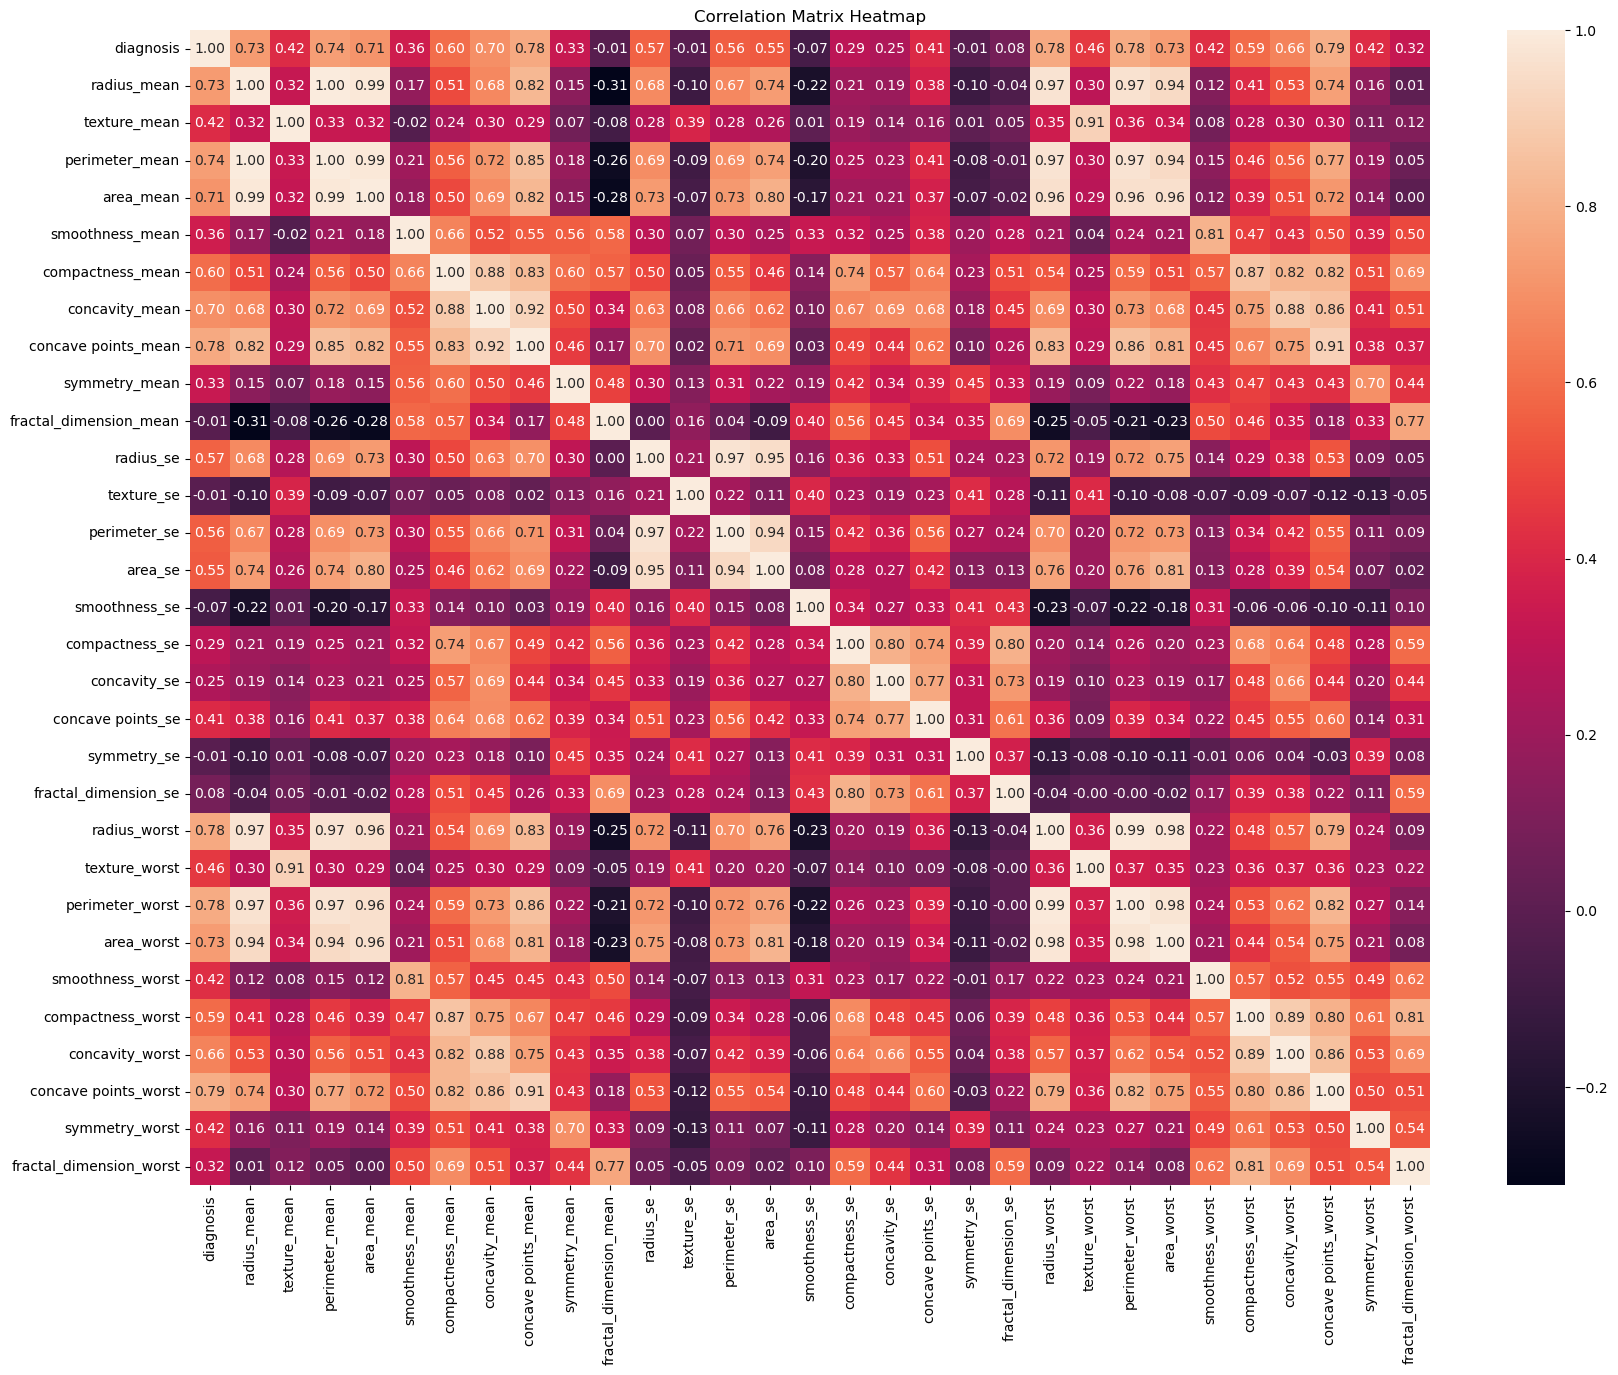

In [9]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

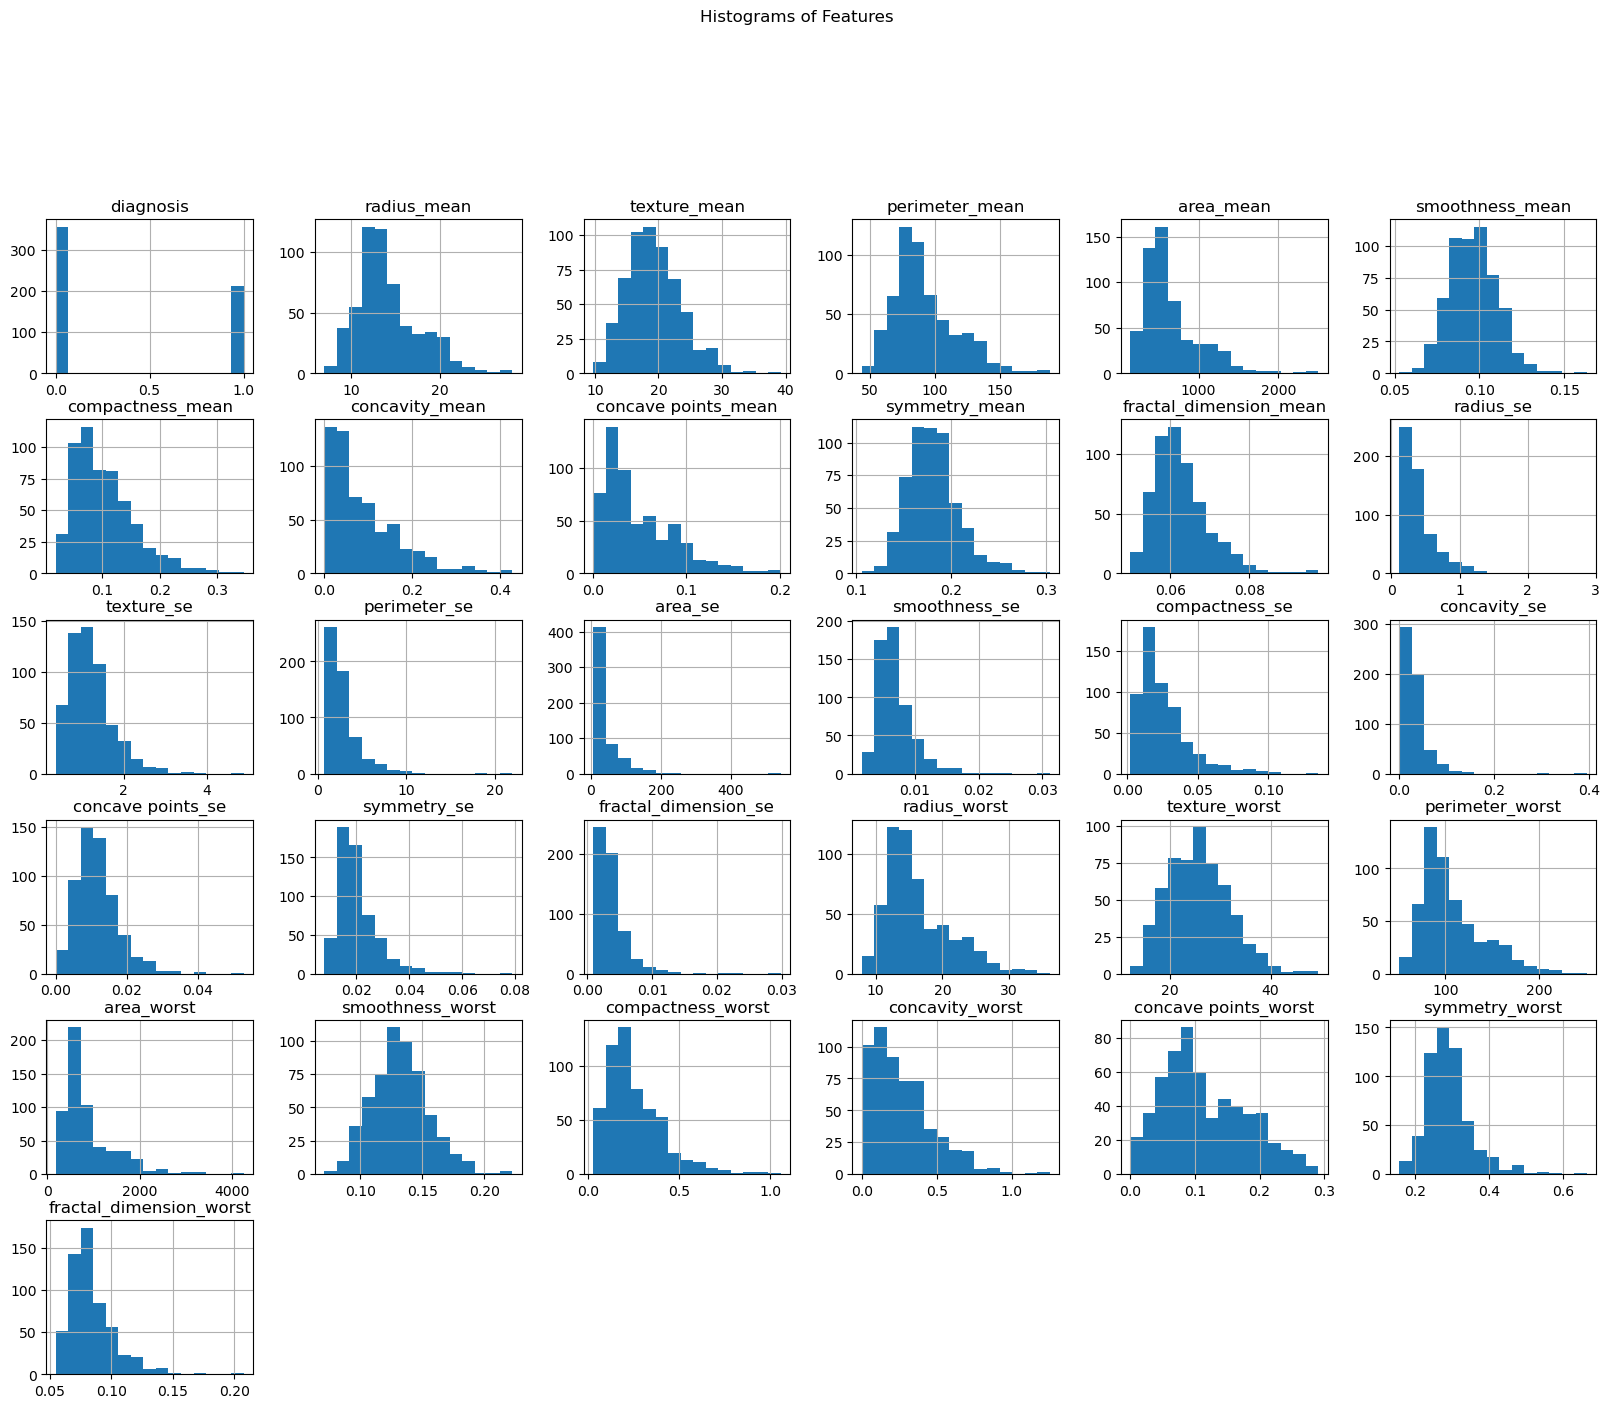

In [10]:
# Plot histograms for each feature
data.hist(bins=15, figsize=(20, 15))
plt.suptitle('Histograms of Features', y=1.02)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Separating the features and target variable
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Number of samples in X_train: {len(X_train_scaled)}")
print(f"Number of samples in y_train: {len(y_train)}")
print(f"Number of samples in X_test: {len(X_test_scaled)}")
print(f"Number of samples in y_test: {len(y_test)}")


Number of samples in X_train: 455
Number of samples in y_train: 455
Number of samples in X_test: 114
Number of samples in y_test: 114


In [12]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_logreg=logreg.predict(X_test)
y_pred_logreg
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_logreg))
print('Accuracy:',accuracy_score(y_test,y_pred_logreg))
print(classification_report(y_test,y_pred_logreg))

[[70  1]
 [ 3 40]]
Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



C:\Users\Monisha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean') #default n_neighbor is 5 default is minhowski
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_knn))
print('Accuracy:',accuracy_score(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

[[71  0]
 [ 5 38]]
Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



C:\Users\Monisha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [14]:
#Ginni index
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred_dtree=dtree.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_dtree))
print('Accuracy:',accuracy_score(y_test,y_pred_dtree))
print(classification_report(y_test,y_pred_dtree))

[[68  3]
 [ 4 39]]
Accuracy: 0.9385964912280702
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [15]:
#Entropy index
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train,y_train)
y_pred_dt=dtree.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_dt))
print('Accuracy:',accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

[[70  1]
 [ 4 39]]
Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [16]:
from sklearn import svm
clf=svm.SVC(kernel='linear',C=0.001)
clf.fit(X_train,y_train)
y_pred_svm=clf.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_svm))
print(accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

[[70  1]
 [ 5 38]]
0.9473684210526315
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10)
rf_classifier.fit(X_train,y_train)
y_pred_rf=rf_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

[[69  2]
 [ 3 40]]
0.956140350877193
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [18]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster=GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(X_train,y_train)
y_pred_gradboost=gradient_booster.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_gradboost))
print(accuracy_score(y_test,y_pred_gradboost))
print(classification_report(y_test,y_pred_gradboost))

[[69  2]
 [ 3 40]]
0.956140350877193
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [19]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(X_train,y_train)
y_pred_abc=abc.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_abc))
print(accuracy_score(y_test,y_pred_abc))
print(classification_report(y_test,y_pred_abc))

[[70  1]
 [ 2 41]]
0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [20]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [21]:
from xgboost import XGBClassifier
model=XGBClassifier(learning_rate=1)
model.fit(X_train,y_train)
y_pred_xgb=model.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_xgb))
print(accuracy_score(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))

[[69  2]
 [ 3 40]]
0.956140350877193
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [22]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [23]:
from catboost import CatBoostClassifier
model1=CatBoostClassifier()
model1.fit(X_train,y_train)
y_pred_cat=model1.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_cat))
print(accuracy_score(y_test,y_pred_cat))
print(classification_report(y_test,y_pred_cat))

Learning rate set to 0.00736
0:	learn: 0.6812589	total: 150ms	remaining: 2m 30s
1:	learn: 0.6692348	total: 154ms	remaining: 1m 17s
2:	learn: 0.6583753	total: 159ms	remaining: 52.7s
3:	learn: 0.6481894	total: 163ms	remaining: 40.5s
4:	learn: 0.6375033	total: 167ms	remaining: 33.2s
5:	learn: 0.6283885	total: 171ms	remaining: 28.3s
6:	learn: 0.6165743	total: 175ms	remaining: 24.8s
7:	learn: 0.6064453	total: 179ms	remaining: 22.2s
8:	learn: 0.5955410	total: 183ms	remaining: 20.2s
9:	learn: 0.5862461	total: 188ms	remaining: 18.6s
10:	learn: 0.5759000	total: 192ms	remaining: 17.3s
11:	learn: 0.5665579	total: 196ms	remaining: 16.1s
12:	learn: 0.5565177	total: 200ms	remaining: 15.2s
13:	learn: 0.5480506	total: 206ms	remaining: 14.5s
14:	learn: 0.5396308	total: 210ms	remaining: 13.8s
15:	learn: 0.5311838	total: 217ms	remaining: 13.3s
16:	learn: 0.5238098	total: 221ms	remaining: 12.8s
17:	learn: 0.5156037	total: 225ms	remaining: 12.3s
18:	learn: 0.5084232	total: 230ms	remaining: 11.9s
19:	learn:

204:	learn: 0.0843682	total: 1.01s	remaining: 3.92s
205:	learn: 0.0838718	total: 1.01s	remaining: 3.92s
206:	learn: 0.0833410	total: 1.02s	remaining: 3.91s
207:	learn: 0.0827961	total: 1.03s	remaining: 3.91s
208:	learn: 0.0824709	total: 1.03s	remaining: 3.9s
209:	learn: 0.0820067	total: 1.03s	remaining: 3.89s
210:	learn: 0.0815757	total: 1.04s	remaining: 3.89s
211:	learn: 0.0810894	total: 1.04s	remaining: 3.88s
212:	learn: 0.0806437	total: 1.05s	remaining: 3.87s
213:	learn: 0.0802488	total: 1.05s	remaining: 3.86s
214:	learn: 0.0796588	total: 1.05s	remaining: 3.85s
215:	learn: 0.0793918	total: 1.06s	remaining: 3.85s
216:	learn: 0.0788563	total: 1.06s	remaining: 3.84s
217:	learn: 0.0784568	total: 1.07s	remaining: 3.84s
218:	learn: 0.0780621	total: 1.07s	remaining: 3.83s
219:	learn: 0.0775120	total: 1.08s	remaining: 3.82s
220:	learn: 0.0772376	total: 1.08s	remaining: 3.81s
221:	learn: 0.0769325	total: 1.09s	remaining: 3.81s
222:	learn: 0.0764472	total: 1.09s	remaining: 3.8s
223:	learn: 0.

385:	learn: 0.0383964	total: 1.79s	remaining: 2.84s
386:	learn: 0.0382100	total: 1.79s	remaining: 2.84s
387:	learn: 0.0380976	total: 1.8s	remaining: 2.84s
388:	learn: 0.0380392	total: 1.81s	remaining: 2.84s
389:	learn: 0.0379284	total: 1.81s	remaining: 2.84s
390:	learn: 0.0378213	total: 1.82s	remaining: 2.83s
391:	learn: 0.0376858	total: 1.82s	remaining: 2.83s
392:	learn: 0.0375408	total: 1.83s	remaining: 2.83s
393:	learn: 0.0374231	total: 1.83s	remaining: 2.82s
394:	learn: 0.0372871	total: 1.84s	remaining: 2.82s
395:	learn: 0.0372104	total: 1.84s	remaining: 2.81s
396:	learn: 0.0370775	total: 1.85s	remaining: 2.81s
397:	learn: 0.0369668	total: 1.85s	remaining: 2.8s
398:	learn: 0.0368486	total: 1.85s	remaining: 2.79s
399:	learn: 0.0367445	total: 1.86s	remaining: 2.79s
400:	learn: 0.0366571	total: 1.86s	remaining: 2.78s
401:	learn: 0.0365147	total: 1.87s	remaining: 2.78s
402:	learn: 0.0364324	total: 1.87s	remaining: 2.77s
403:	learn: 0.0363401	total: 1.88s	remaining: 2.77s
404:	learn: 0.

573:	learn: 0.0223492	total: 2.58s	remaining: 1.91s
574:	learn: 0.0222516	total: 2.58s	remaining: 1.91s
575:	learn: 0.0222060	total: 2.58s	remaining: 1.9s
576:	learn: 0.0221495	total: 2.59s	remaining: 1.9s
577:	learn: 0.0220778	total: 2.59s	remaining: 1.89s
578:	learn: 0.0220265	total: 2.6s	remaining: 1.89s
579:	learn: 0.0219676	total: 2.6s	remaining: 1.88s
580:	learn: 0.0219194	total: 2.61s	remaining: 1.88s
581:	learn: 0.0218129	total: 2.61s	remaining: 1.88s
582:	learn: 0.0217696	total: 2.62s	remaining: 1.87s
583:	learn: 0.0216846	total: 2.62s	remaining: 1.87s
584:	learn: 0.0216262	total: 2.62s	remaining: 1.86s
585:	learn: 0.0215787	total: 2.63s	remaining: 1.86s
586:	learn: 0.0215183	total: 2.63s	remaining: 1.85s
587:	learn: 0.0214681	total: 2.63s	remaining: 1.85s
588:	learn: 0.0214008	total: 2.64s	remaining: 1.84s
589:	learn: 0.0213231	total: 2.64s	remaining: 1.84s
590:	learn: 0.0212886	total: 2.65s	remaining: 1.83s
591:	learn: 0.0212162	total: 2.65s	remaining: 1.83s
592:	learn: 0.02

761:	learn: 0.0143756	total: 3.4s	remaining: 1.06s
762:	learn: 0.0143439	total: 3.41s	remaining: 1.06s
763:	learn: 0.0143129	total: 3.41s	remaining: 1.05s
764:	learn: 0.0142671	total: 3.42s	remaining: 1.05s
765:	learn: 0.0142308	total: 3.42s	remaining: 1.04s
766:	learn: 0.0141908	total: 3.43s	remaining: 1.04s
767:	learn: 0.0141662	total: 3.43s	remaining: 1.04s
768:	learn: 0.0141326	total: 3.43s	remaining: 1.03s
769:	learn: 0.0141022	total: 3.44s	remaining: 1.03s
770:	learn: 0.0140754	total: 3.44s	remaining: 1.02s
771:	learn: 0.0140459	total: 3.45s	remaining: 1.02s
772:	learn: 0.0140019	total: 3.45s	remaining: 1.01s
773:	learn: 0.0139801	total: 3.46s	remaining: 1.01s
774:	learn: 0.0139574	total: 3.46s	remaining: 1s
775:	learn: 0.0139202	total: 3.46s	remaining: 1s
776:	learn: 0.0138902	total: 3.47s	remaining: 996ms
777:	learn: 0.0138604	total: 3.47s	remaining: 991ms
778:	learn: 0.0138293	total: 3.48s	remaining: 986ms
779:	learn: 0.0137966	total: 3.48s	remaining: 982ms
780:	learn: 0.01375

947:	learn: 0.0099319	total: 4.21s	remaining: 231ms
948:	learn: 0.0099210	total: 4.21s	remaining: 226ms
949:	learn: 0.0098936	total: 4.22s	remaining: 222ms
950:	learn: 0.0098778	total: 4.22s	remaining: 218ms
951:	learn: 0.0098657	total: 4.23s	remaining: 213ms
952:	learn: 0.0098492	total: 4.23s	remaining: 209ms
953:	learn: 0.0098352	total: 4.24s	remaining: 204ms
954:	learn: 0.0098135	total: 4.24s	remaining: 200ms
955:	learn: 0.0098027	total: 4.24s	remaining: 195ms
956:	learn: 0.0097950	total: 4.25s	remaining: 191ms
957:	learn: 0.0097795	total: 4.25s	remaining: 186ms
958:	learn: 0.0097618	total: 4.25s	remaining: 182ms
959:	learn: 0.0097429	total: 4.26s	remaining: 177ms
960:	learn: 0.0097228	total: 4.26s	remaining: 173ms
961:	learn: 0.0097051	total: 4.27s	remaining: 169ms
962:	learn: 0.0096841	total: 4.27s	remaining: 164ms
963:	learn: 0.0096639	total: 4.28s	remaining: 160ms
964:	learn: 0.0096484	total: 4.28s	remaining: 155ms
965:	learn: 0.0096276	total: 4.28s	remaining: 151ms
966:	learn: 

In [24]:
import numpy as np
#from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
X=np.array([y_pred_logreg,y_pred_knn,y_pred_dt,y_pred_dtree,y_pred_svm]).T
meta_learner=RandomForestClassifier()
meta_learner.fit(X,y_test)
ensemble_predictions=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[71  0]
 [ 2 41]]
0.9824561403508771
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [25]:
import numpy as np
#from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
X=np.array([y_pred_logreg,y_pred_knn,y_pred_dt,y_pred_svm]).T
meta_learner=RandomForestClassifier()
meta_learner.fit(X,y_test)
ensemble_predictions=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[71  0]
 [ 2 41]]
0.9824561403508771
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [26]:
import numpy as np
#from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
X=np.array([y_pred_rf,y_pred_gradboost,y_pred_abc,y_pred_xgb,y_pred_cat]).T
meta_learner=RandomForestClassifier()
meta_learner.fit(X,y_test)
ensemble_predictions=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[70  1]
 [ 2 41]]
0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [27]:
import numpy as np
#from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
X=np.array([y_pred_cat,y_pred_logreg,y_pred_abc,y_pred_xgb,y_pred_svm]).T
meta_learner=RandomForestClassifier()
meta_learner.fit(X,y_test)
ensemble_predictions=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[70  1]
 [ 2 41]]
0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [28]:
import numpy as np
#from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
X=np.array([y_pred_cat,y_pred_logreg,y_pred_dtree,y_pred_xgb,y_pred_svm]).T
meta_learner=RandomForestClassifier()
meta_learner.fit(X,y_test)
ensemble_predictions=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[70  1]
 [ 2 41]]
0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [29]:
import numpy as np
#from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
X=np.array([y_pred_cat,y_pred_logreg,y_pred_rf,y_pred_xgb,y_pred_svm]).T
meta_learner=RandomForestClassifier()
meta_learner.fit(X,y_test)
ensemble_predictions=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[70  1]
 [ 2 41]]
0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [30]:
import numpy as np
#from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
X=np.array([y_pred_cat,y_pred_logreg,y_pred_knn,y_pred_xgb,y_pred_svm]).T
meta_learner=RandomForestClassifier()
meta_learner.fit(X,y_test)
ensemble_predictions=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[71  0]
 [ 2 41]]
0.9824561403508771
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [31]:
import numpy as np
#from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
X=np.array([y_pred_cat,y_pred_logreg,y_pred_dt,y_pred_xgb,y_pred_svm]).T
meta_learner=RandomForestClassifier()
meta_learner.fit(X,y_test)
ensemble_predictions=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[71  0]
 [ 3 40]]
0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [32]:
import numpy as np
#from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
X=np.array([y_pred_dtree,y_pred_dt,y_pred_knn,y_pred_abc,y_pred_xgb]).T
meta_learner=RandomForestClassifier()
meta_learner.fit(X,y_test)
ensemble_predictions=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,ensemble_predictions))
print(accuracy_score(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))

[[70  1]
 [ 1 42]]
0.9824561403508771
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [34]:
!pip install joblib

In [36]:
import joblib

In [37]:

# Save the model
joblib.dump(meta_learner, 'ml.pkl')

['ml.pkl']

In [41]:
model = joblib.load('ml.pkl')

In [43]:
import json

# Step 1: Load the model from the .pkl file
#loaded_model = joblib.load('my_model.pkl')

# Step 2: Extract relevant information
# For a scikit-learn model, you can get parameters and feature importances
# Correct the typo in '_name_'
model_data = {
    'model_type': type(model).__name__,  # Use __name__ to get the class name
    'params': model.get_params(),        # Get parameters of the model
}

print(model_data)


if hasattr(model, 'feature_importances_'):
    model_data['feature_importances'] = model.feature_importances_.tolist()  # Convert to list for JSON serialization

# Step 3: Convert to JSON
with open('model_data.json', 'w') as json_file:
    json.dump(model_data, json_file, indent=4)

print("Model data has been saved to model_data.json")

{'model_type': 'RandomForestClassifier', 'params': {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}}
Model data has been saved to model_data.json
